In [20]:
import utils
import pandas as pd
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import utils
import PIL.Image
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [21]:
# Load the data
# 1.nc: 2022-01-01 ~ 2022-05-31
# 2.nc: 2022-06-01 ~ 2022-12-31
sea_level_anom = xr.open_dataset(r'data/1.nc')
sea_level_anom2 = xr.open_dataset(r'data/2.nc')

# concatenate two dataset
mn_yr_sla = xr.concat([sea_level_anom, sea_level_anom2], dim='time')

In [22]:
# calculate the mean of 2022
mn_yr_sla = mn_yr_sla.mean(dim='time')
mn_yr_sla

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    sla        (latitude, longitude) float64 nan nan nan nan ... nan nan nan nan

In [23]:
# get minimum and maximum value of the sea level anomaly
target = mn_yr_sla['sla']
sla_min = target.min().item()
sla_max = target.max().item()
sla_range = sla_max - sla_min

print(f"min: {sla_min}, max: {sla_max}, range: {sla_range}")

min: -1.5979543307086614, max: 3.1051, range: 4.703054330708662


In [24]:
# plot the sea level anomaly of 2022 mean and save the file
utils.xr_plot_climatology(target,
                          f'2022 mean {target.name}',
                          f'2022 mean {target.name}.png',
                          -sla_max, 
                          sla_max,
                          -180, 360,
                          -91, 92)

<Figure size 640x480 with 0 Axes>

In [25]:
# calculate the mean of 2022
sla_avg = target.mean()

# calculate the standard deviation of 2022
sla_var = target.var()

# calculate the standard deviation of 2022
sla_std = target.std()

print(f"average:{sla_avg.values}")
print(f"variance:{sla_var.values}")
print(f"standard deviation:{sla_std.values}")

average:0.05880158490638263
variance:0.006616089316991617
standard deviation:0.0813393466717776


In [26]:
# calculate the median of 2022
sla_median = target.median()

# calculate quantiles of 2022
sla_quantiles = target.quantile([0.25, 0.5, 0.75])

print(f"median:{sla_median.values}")
print(f"quantiles:{sla_quantiles.values}")

median:0.05734544198895027
quantiles:[0.02297604 0.05734544 0.09151326]


In [27]:
# preprocessing: 2D to 1D
data_values = target.values.flatten() 

# preprocessing: remove nan values
data_values = data_values[~np.isnan(data_values)]

sla_skewness = skew(data_values)
sla_kurtosis = kurtosis(data_values)

print(f"skewness:{sla_skewness}")
print(f"kurtosis:{sla_kurtosis}")

skewness:0.3174173836993857
kurtosis:44.00989113829252


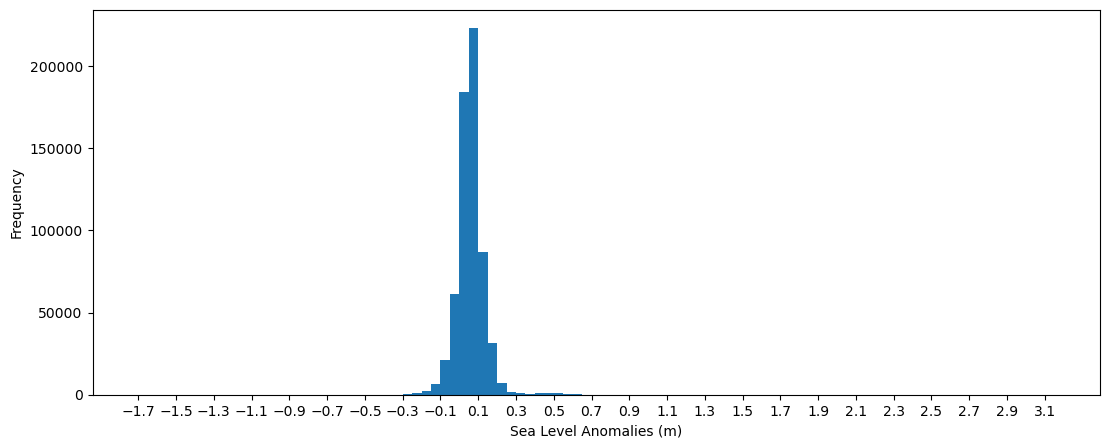

In [28]:
bins = np.arange(-1.7, 3.2, 0.05)
xticks = np.arange(-1.7, 3.2, 0.2)

# draw histogram
plt.figure(figsize=(13, 5))
plt.hist(data_values, bins=bins)
plt.xlabel('Sea Level Anomalies (m)')
plt.xticks(xticks)
plt.ylabel('Frequency')
plt.savefig('histogram_raw.png', dpi=300, bbox_inches='tight')

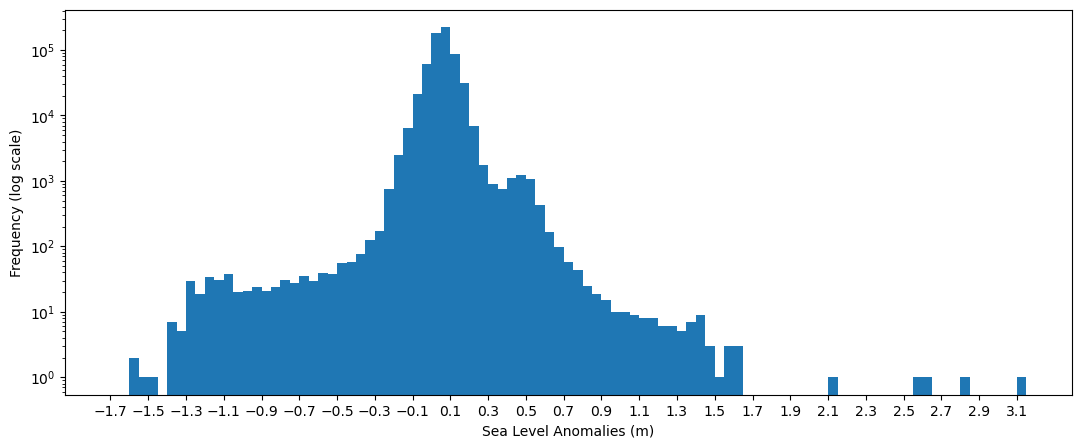

In [29]:
# draw better histogram

plt.figure(figsize=(13, 5))
plt.hist(data_values, bins=bins, log = True)
plt.xlabel('Sea Level Anomalies (m)')
plt.xticks(xticks)
plt.ylabel('Frequency (log scale)')
plt.savefig('histogram_logscale.png', dpi=300, bbox_inches='tight')

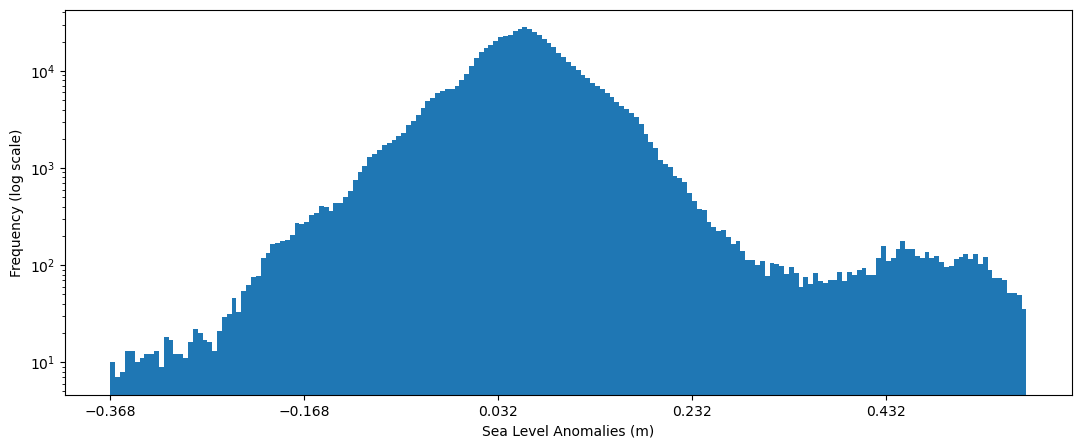

In [30]:
# draw histogram without outlier

vmin, vmax = target.quantile([0.001, 0.999]).values

bins = np.arange(vmin, vmax, 0.005)
xticks = np.arange(vmin, vmax, 0.2)

plt.figure(figsize=(13, 5))
plt.hist(data_values, bins=bins, log = True)
plt.xlabel('Sea Level Anomalies (m)')
plt.xticks(xticks)
plt.ylabel('Frequency (log scale)')
plt.savefig('histogram_improved_NoOutlier.png', dpi=300, bbox_inches='tight')

In [31]:
# plot the sea level anomaly of 2022 mean, improved visibility 

utils.xr_plot_climatology(target,
                          f'2022 mean {target.name}_improved',
                          f'2022 mean {target.name}_improved.png',
                          -vmax, 
                          vmax,
                          -180, 360,
                          -91, 92)

<Figure size 640x480 with 0 Axes>

In [32]:
vmin, vmax

(-0.3680857960526316, 0.5812495374399874)

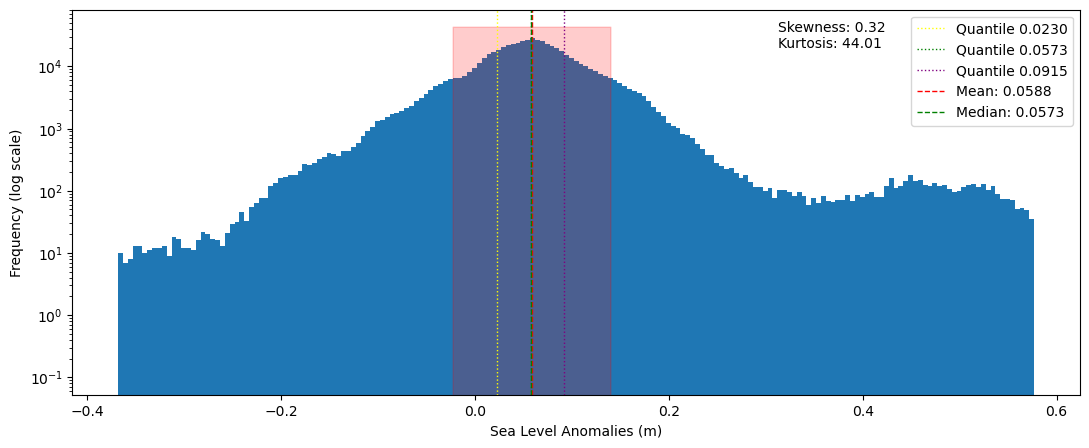

In [37]:
# existing histogram plotting code
plt.figure(figsize=(13, 5))
plt.hist(data_values, bins=bins, log=True)

# Calculate and plot quantiles
colors = ['yellow', 'green', 'purple']  # Colors for the quantile lines
for quantile, color in zip(sla_quantiles, colors):
    plt.axvline(quantile, color=color, linestyle='dotted', linewidth=1, label=f'Quantile {quantile:.4f}')

# Plot mean and median
plt.axvline(sla_avg, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {sla_avg:.4f}')
plt.axvline(sla_median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {sla_median:.4f}')

# Plot standard deviation
plt.fill_betweenx(y=np.arange(0, plt.ylim()[1], 0.1), 
                  x1=sla_avg-sla_std, x2=sla_avg+sla_std, color='r', alpha=0.2)

# Annotate skewness and kurtosis
plt.annotate(f'Skewness: {sla_skewness:.2f}\nKurtosis: {sla_kurtosis:.2f}', xy=(0.7, 0.9), xycoords='axes fraction')

plt.legend()
plt.xlabel('Sea Level Anomalies (m)')
plt.ylabel('Frequency (log scale)')
plt.savefig('histogram_improved_with_stats.png', dpi=300, bbox_inches='tight')